In [35]:
import pandas as pd


In [36]:
car=pd.read_csv('D:\Data Analyis\Python practice\Projects\Project-4\Project-4\Project+2+-+Cars+Dataset.csv')

In [37]:
car.head(5)

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265.0,17.0,23.0,4451.0,106.0,189.0
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200.0,24.0,31.0,2778.0,101.0,172.0
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200.0,22.0,29.0,3230.0,105.0,183.0
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270.0,20.0,28.0,3575.0,108.0,186.0
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225.0,18.0,24.0,3880.0,115.0,197.0


In [38]:
car.shape

(432, 15)

In [39]:
#data cleaning
car.isnull().sum()

Make           4
Model          4
Type           4
Origin         4
DriveTrain     4
MSRP           4
Invoice        4
EngineSize     4
Cylinders      6
Horsepower     4
MPG_City       4
MPG_Highway    4
Weight         4
Wheelbase      4
Length         4
dtype: int64

In [40]:
car['Cylinders'].fillna(car['Cylinders'].mean (), inplace=True)
car['Horsepower'].fillna(car['Horsepower'].mean (), inplace=True)
car['Weight'].fillna(car['Weight'].mean (), inplace=True)


C:\Users\Yonatan\AppData\Local\Temp\ipykernel_3488\4068515021.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  car['Cylinders'].fillna(car['Cylinders'].mean (), inplace=True)
C:\Users\Yonatan\AppData\Local\Temp\ipykernel_3488\4068515021.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as

In [41]:
car['Make'].value_counts()

Make
Toyota           28
Chevrolet        27
Mercedes-Benz    26
Ford             23
BMW              20
Audi             19
Honda            17
Nissan           17
Volkswagen       15
Chrysler         15
Dodge            13
Mitsubishi       13
Volvo            12
Jaguar           12
Hyundai          12
Subaru           11
Pontiac          11
Mazda            11
Lexus            11
Kia              11
Buick             9
Mercury           9
Lincoln           9
Saturn            8
Cadillac          8
Suzuki            8
Infiniti          8
GMC               8
Acura             7
Porsche           7
Saab              7
Land Rover        3
Oldsmobile        3
Jeep              3
Scion             2
Isuzu             2
MINI              2
Hummer            1
Name: count, dtype: int64

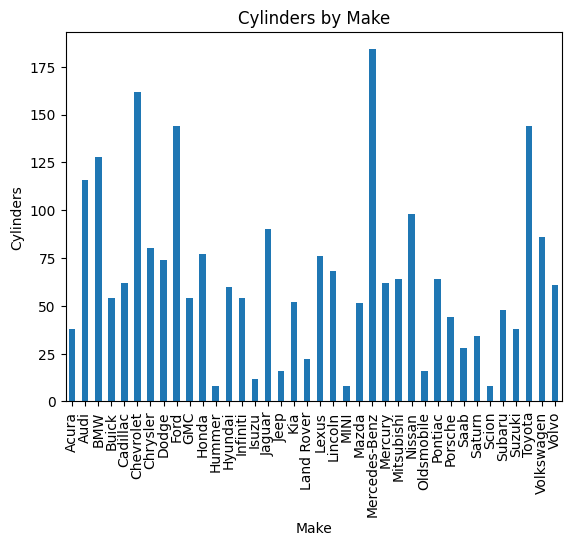

In [42]:
import matplotlib.pyplot as plt

# Assuming 'car' is your DataFrame and 'ValueColumn' is the column with values you want to sum

# Aggregate the total values for each 'Make'
total_values = car.groupby('Make')['Cylinders'].sum()

# Plot the aggregated data
total_values.plot(kind='bar')

# Adding labels and title
plt.xlabel('Make')
plt.ylabel('Cylinders')
plt.title('Cylinders by Make')

# Display the plot
plt.show()

In [43]:
# Install folium if not already installed
!pip install folium

import folium

# Function to get color based on country
def get_color(country):
    colors = {
        'USA': 'blue',
        'Germany': 'green',
        'Japan': 'red',
        # Add more countries and colors as needed
    }
    return colors.get(country, 'gray')  # Default to gray if country not in dictionary

# Sample DataFrame for demonstration purposes
data = {
    'Make': ['Toyota', 'Ford', 'BMW', 'Toyota', 'Ford'],
    'ValueColumn': [100, 200, 150, 300, 250],
    'Country': ['USA', 'USA', 'Germany', 'Japan', 'USA'],
    'Latitude': [37.7749, 40.7128, 52.5200, 35.6895, 40.7128],
    'Longitude': [-122.4194, -74.0060, 13.4050, 139.6917, -74.0060]
}
car = pd.DataFrame(data)

# Create a folium map centered at an average location
map_center = [car['Latitude'].mean(), car['Longitude'].mean()]
car_map = folium.Map(location=map_center, zoom_start=2)

# Add markers to the map
for idx, row in car.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"{row['Make']} ({row['Country']})",
        icon=folium.Icon(color=get_color(row['Country']))
    ).add_to(car_map)

# Display the map
car_map


In [44]:
filtered_car = car[car['Origin'].isin(['Asia', 'Europe'])]

KeyError: 'Origin'

In [ ]:
filtered_car.head()


,Make,Origin,Wheelbase,Country,Latitude,Longitude


In [ ]:
# Assuming 'car' is your DataFrame
filtered_car = car[car['Origin'].isin(['Asia', 'Europe'])]

# Print the filtered DataFrame
print(filtered_car)

# Or display it in a Jupyter Notebook
filtered_car

# Display the first few rows to confirm
filtered_car.head()


Empty DataFrame
Columns: [Make, Origin, Wheelbase, Country, Latitude, Longitude]
Index: []


,Make,Origin,Wheelbase,Country,Latitude,Longitude


In [45]:
car.head()

,Make,ValueColumn,Country,Latitude,Longitude
0,Toyota,100,USA,37.7749,-122.4194
1,Ford,200,USA,40.7128,-74.0060
2,BMW,150,Germany,52.5200,13.4050
3,Toyota,300,Japan,35.6895,139.6917
4,Ford,250,USA,40.7128,-74.0060


In [47]:
car[car['Make']>'Ford']

,Make,ValueColumn,Country,Latitude,Longitude
0,Toyota,100,USA,37.7749,-122.4194
3,Toyota,300,Japan,35.6895,139.6917
